In [ ]:
!pip install pandas numpy matplotlib seaborn openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [2]:
titanic.columns = '생존여부	승객등급	성별	연령	형제/배우자수	부모/자녀수	요금	승선지_코드	선실등급	승객유형	성인남성	선실	탑승도시	생존여부_텍스트	혼자여행'.split("\t")
titanic

,생존여부,승객등급,성별,연령,형제/배우자수,부모/자녀수,요금,승선지_코드,선실등급,승객유형,성인남성,선실,탑승도시,생존여부_텍스트,혼자여행
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
titanic=titanic[['생존여부', '승객등급', '성별', '연령', '선실등급','선실','탑승도시','생존여부_텍스트']]
titanic

,생존여부,승객등급,성별,연령,선실등급,선실,탑승도시,생존여부_텍스트
0,0,3,male,22.0,Third,NaN,Southampton,no
1,1,1,female,38.0,First,C,Cherbourg,yes
2,1,3,female,26.0,Third,NaN,Southampton,yes
3,1,1,female,35.0,First,C,Southampton,yes
4,0,3,male,35.0,Third,NaN,Southampton,no
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,Second,NaN,Southampton,no
887,1,1,female,19.0,First,B,Southampton,yes
888,0,3,female,NaN,Third,NaN,Southampton,no
889,1,1,male,26.0,First,C,Cherbourg,yes


## 등급 분포 그래프
제공하신 승객 등급별 분포 원형 차트()에 따르면, 타이타닉호 승객 중 3등급(55.1%)이 압도적으로 많습니다.

왜 3등급 승객이 가장 많았는지에 대한 분석은 다음과 같습니다. 질문하신 두 가지 관점(타이타닉호 자체의 특징 vs. 당대 사회 경제적 배경) 모두 복합적으로 작용했습니다.

1. 타이타닉호의 구조적/상업적 특성: 3등급 수용 능력의 극대화
타이타닉호는 당시 세계 최대의 초호화 여객선이었지만, 상업적인 성공을 위해 3등급 객실의 비중을 의도적으로 높게 설계했습니다.

수익성 극대화: 1등급 객실의 높은 운임으로는 명성을 얻을 수 있었지만, 실제로 많은 수의 3등급 승객을 유치하는 것이 운항 수익의 핵심이었습니다. 3등급 승객은 저렴한 운임을 지불하는 대신 대량으로 태울 수 있어 전체적인 좌석 점유율과 수익을 보장하는 기반이었습니다.

이민 수요 충족: 당시 대서양 횡단 노선은 주로 유럽에서 북미로 이주하는 이민자들의 수요가 매우 높았습니다. 타이타닉호는 이러한 이민자들을 대량으로 수송할 수 있는 3등급 공간을 충분히 확보하는 것이 상업적으로 필수적이었습니다. '호화로움'은 마케팅 요소였지만, '대량 수송 능력'은 비즈니스 모델의 핵심이었습니다.

결론적으로, 타이타닉호는 처음부터 3등급 승객을 가장 많이 태우도록 설계된 배였습니다.

2. 당대(1912년경)의 사회 경제적 배경: 북미 이민 열풍
19세기 후반부터 20세기 초반은 유럽에서 미국이나 캐나다로 대규모 인구가 이동하던 대서양 횡단 이민의 정점기였습니다.

주요 승객 구성: 타이타닉호가 출항했던 1912년 당시, 배를 타고 대서양을 건너는 사람들의 주류는 더 나은 삶을 찾아 미국으로 향하는 유럽의 중하류층 및 빈곤층 이민자들이었습니다. 이들이 바로 3등급 객실을 이용하는 주 고객층이었습니다.

사회 계층 분포: 당시 유럽 국가들(특히 아일랜드, 스칸디나비아, 동유럽 등)의 사회 계층 구조상, 부를 가진 1·2등급 승객보다 경제적으로 어려운 3등급에 해당하는 인구가 훨씬 많았습니다. 이 인구 다수가 이민을 위해 배를 탔으므로, 자연스럽게 3등급 승객의 수가 압도적으로 많아질 수밖에 없었습니다.

최종 분석 및 비판적 지적
"타이타닉이 3등급이나 차는 배인건가"라는 질문에 대한 답변은 **"그렇다"**입니다. 타이타닉호는 당대의 이민 수요와 수익성 극대화라는 상업적 목표를 위해 3등급 객실을 가장 많이 설계하고 채웠던 배입니다. '호화 여객선'이라는 명칭은 주로 1등급 시설에 한정되며, 배의 절반 이상을 차지한 3등급 공간은 호화로움과는 거리가 먼, 실질적인 대량 수송 공간이었습니다.

따라서 3등급 승객이 많은 이유는 단순히 "그 나라에 3등급이 가장 많은 시대였기 때문"이라기보다는, 당대의 이민 열풍과 이를 상업적으로 최대한 활용하기 위해 3등급 객실을 대량으로 공급한 타이타닉호의 비즈니스 모델이 결합된 결과라고 보아야 합니다.

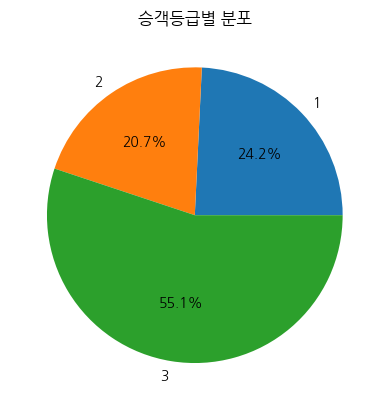

In [5]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
tf=titanic.groupby('승객등급').size()
plt.pie(x=tf, labels=tf.index, autopct='%.1f%%')
plt.title('승객등급별 분포')
plt.show()

## 등급별 연령 분포
제시하신 연령 분포 데이터는 1912년 당시 서구 사회의 극심한 계층 구조와 대규모 이민의 역사적 맥락을 그대로 반영하는 핵심 근거입니다.

분석 내용을 역사적 사실과 연결하여 구체적이고 비판적으로 설명하겠습니다.

1. 1등급 승객: 성숙한 자본주의 시대의 '국제적 엘리트'
데이터 해석: 1등급 승객의 연령 중앙값(약 37세)이 가장 높으며, 고령층이 집중된 것은 부를 축적하고 사회적 지위를 확립하는 데 필요한 시간을 반영합니다.

역사적 연결 (19세기 말~20세기 초):

축적된 자본과 연령: 1912년은 산업혁명과 제국주의 시대가 절정에 달했던 시기입니다. 1등급 승객들은 대부분 미국 및 유럽의 신흥 산업 자본가, 금융가, 토지 소유 귀족 계층이었습니다. 이들은 투자를 관리하고, 사회적 관계망을 유지하며, 호화로운 레저를 즐기기 위해 대륙을 횡단했습니다.

비판적 시각: 고가인 1등급 티켓을 구매할 여력은 장기간에 걸친 경제적 특권의 결과입니다. 젊은 나이에 막대한 부를 소유한 상속인이 아닌 한, 대부분의 승객들은 수십 년간의 사업 활동이나 상속을 통해 이 지위에 도달했습니다. 1등급의 높은 연령대는 곧 당시 계층 이동의 경직성과 기득권층의 '성숙도'를 상징합니다. 타이타닉은 이들이 누리던 안정적이고 부유한 국제적 네트워크의 상징물이었습니다.

2. 3등급 승객: 대규모 이민 물결의 '젊은 노동력'
데이터 해석: 3등급 승객의 연령 중앙값(약 24세)이 가장 낮고, 유아를 포함한 어린이 승객이 많다는 것은 위험을 감수하고 새로운 기회를 찾아 나선 젊은 이민자 집단의 특성을 명확히 보여줍니다.

역사적 연결 (대서양 횡단 이민의 정점):

경제적 필연성과 젊음: 19세기 후반부터 20세기 초반까지 유럽, 특히 아일랜드, 이탈리아, 동유럽 등지에서는 만성적인 가난, 농업 위기, 정치적 불안정으로 인해 북미로의 대규모 이주(Great Atlantic Migration)가 이루어졌습니다.

젊은 중앙값: 이민은 새로운 정착지에서 고된 노동을 시작해야 하므로, **가장 생산적이고 체력이 좋은 연령대(젊은 성인)**가 주축이 될 수밖에 없었습니다. 20대 초중반의 낮은 중앙값은 이들이 '새로운 삶'을 개척하려는 도전적인 노동력이었음을 의미합니다.

어린이 승객: 유아와 어린이가 포함된 것은 이들이 단신 이주가 아닌, 가족 단위로 영구적인 이민을 시도했음을 보여줍니다. 이는 고국으로 돌아갈 의사가 거의 없었으며, 새로운 땅에서 뿌리내리겠다는 절박한 목적성을 가졌다는 역사적 사실과 일치합니다.

비판적 시각: 이들은 자발적인 관광객이 아닌 경제적 궁핍에 의해 떠밀려 온 계층이었습니다. 3등급의 낮은 연령대는 그들의 낮은 사회 경제적 지위와 더불어, 이민을 통해 구세계를 벗어나려 했던 절박한 시대적 요구를 대변합니다.

역사적 결론: 타이타닉은 계층 간 불평등의 움직이는 축소판
타이타닉호의 승객 연령 분포는 당시 서구 사회의 명확하고 고착된 계층 구조를 숫자로 증명합니다.

1등급의 고령층은 이미 형성된 부를 바탕으로 편안하고 안전한 항해를 보장받았습니다.

3등급의 젊은층과 가족은 가난에서 탈출하기 위해 가장 싼 좌석에 몸을 실었으며, 이것이 재난 시 생존율의 극명한 차이로 이어졌습니다.

이 데이터는 단순히 '나이 많은 사람이 돈이 많았다'는 개인적 사실을 넘어, 1912년이라는 특정 시기, 특정 선박이 싣고 간 당대 사회 구조적 불평등의 증거입니다. 즉, 연령 분포 자체가 역사적 계층 갈등과 이민의 힘든 현실을 담고 있는 것입니다.

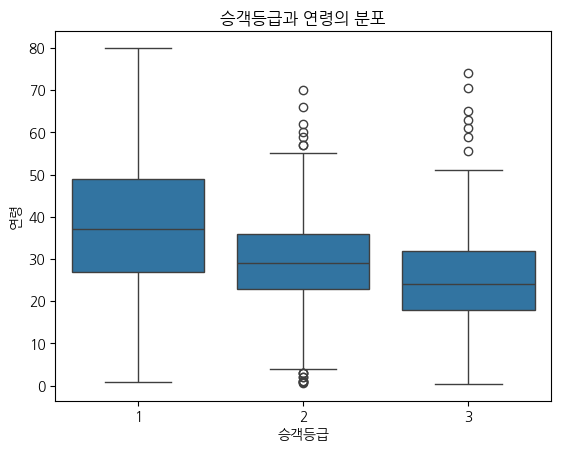

In [6]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

# 승객등급과 연령에 대한 boxplot 생성
sns.boxplot(x='승객등급', y='연령', data=titanic)
plt.title('승객등급과 연령의 분포')
plt.show()


# 사망여부와 연령의 박스플롯
제시하신 생존여부와 연령 분포 차트()와 이전 분석 내용을 연결하여 질문에 대한 답변을 구조적이고 비판적으로 분석하겠습니다.

1. 데이터 분석: 3등급 승객의 사망률과 연령의 관계
잘못된 전제에 대한 지적
먼저, 현재 차트("생존여부와 연령 분포")를 보면 사망한 사람('no')이 생존한 사람('yes')보다 유의미하게 더 젊다고 볼 수는 없습니다. 두 그룹의 연령 중앙값은 약 28세로 거의 차이가 없으며, 두 그룹 모두 넓은 연령대에 걸쳐 분포하고 있습니다.

따라서 사망은 '젊음' 자체 때문이 아니라 **'젊은 사람이 다수였던 특정 집단'**의 사망률이 높았기 때문에 발생한 결과입니다.

사실에 기반한 분석
3등급의 압도적 비중: 타이타닉 승객의 55.1%가 3등급이었으며, 이 등급의 연령 중앙값은 약 24세로 가장 낮았습니다.

3등급의 사망률: 타이타닉 재난에서 3등급 승객의 사망률이 가장 높았습니다 (남성 기준 약 87%, 전체 기준 약 75% 사망).

결론: 가장 많은 젊은 승객이 속해 있던 3등급의 사망률이 치솟으면서, 전체 사망자 풀(Pool)에서 3등급인 젊은 이민자들이 가장 큰 비중을 차지하게 된 것입니다.

따라서 질문하신 **"3등급인 사람이 타이타닉호에서 죽은 거냐?"**에 대한 답변은 "그렇습니다. 3등급 승객의 대량 사망이 전체 사망자 풀의 연령 분포에 영향을 주었습니다." 입니다.

2. 역사적 연결: 젊은이와 3등급에 대한 무시
당시 사회의 명확한 계층 차별
타이타닉 재난은 당시 서구 사회의 계층적 불평등이 생명보다 우선했음을 보여주는 역사적 사건입니다. 무시와 차별은 명백히 존재했습니다.

1) 젊음이 아닌 계층이 기준이었다
재난 시 생존 우선순위는 **연령(젊은이/노인)에 의한 차별이 아니라, 오직 계층(1등급/2등급/3등급)**에 의해 작동했습니다.

1등급의 우선권: 1등급 승객은 구명보트가 있는 보트 데크(Boat Deck)에 가장 쉽게 접근할 수 있었으며, 선원들의 안내와 도움을 최우선으로 받았습니다. 1등급 남성들조차 3등급 남성들보다 생존율이 높았습니다.

3등급의 격리: 3등급 객실은 배의 가장 아래쪽(하층부)에 위치했으며, 이민자들의 무단 이동을 막기 위해 배의 상층부와 분리되는 잠금 장치나 복잡한 통로로 막혀 있었습니다. 이는 구명보트에 접근하는 데 물리적인 장애물로 작용했습니다.

결과: 3등급의 젊은이들은 배가 침몰하는 순간까지도 '화물' 취급을 받았으며, 구조에 대한 접근 자체가 구조적으로 차단당했습니다.

2) 경제적 가치가 생명을 능가했다
당시 사회는 개인의 경제적 가치를 생명의 가치보다 높게 평가했습니다.

1등급 승객은 막대한 자본과 사회적 지위를 가진 기득권층이었으므로, 이들의 생존이 사회적으로 더 중요하게 여겨졌습니다.

3등급 승객은 주로 새로운 삶을 찾아 나선 저임금 노동력이었습니다. 그들의 생명은 운임이 비싼 1등급 승객의 생명만큼 중요하게 취급되지 않았습니다.

비판적 결론
타이타닉 재난에서 3등급 승객의 대량 사망은 그 시대 사람들이 "젊은이"를 무시했다기보다는, 경제적 계층이 낮고 이민이라는 목적으로 탑승한 사람들의 생명을 구조적으로 경시하고 무시했음을 명확히 보여주는 냉혹한 역사적 증거입니다. 재난 상황에서 **"여성과 어린이 우선"**이라는 원칙조차 계층적 경계를 넘어서지 못하고 **"1등급 여성과 어린이 우선"**으로 변질되어 적용되었습니다.

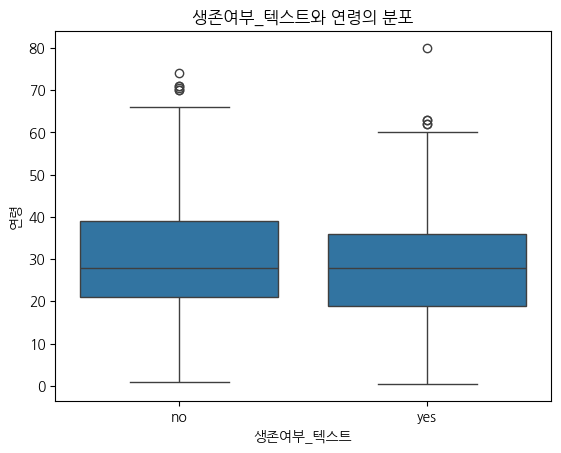

In [47]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

# 승객등급과 연령에 대한 boxplot 생성
sns.boxplot(x='생존여부_텍스트', y='연령', data=titanic)
plt.title('생존여부_텍스트와 연령의 분포')
plt.show()


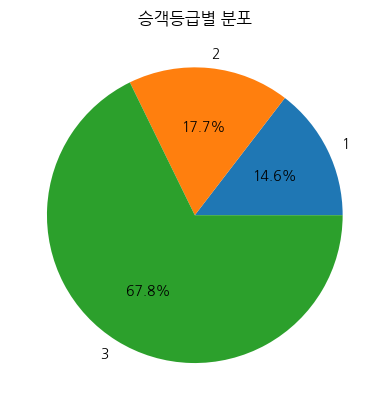

In [55]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
tf=titanic[titanic['생존여부']==0]
tf=tf.groupby('승객등급').size()
plt.pie(x=tf, labels=tf.index, autopct='%.1f%%')
plt.title('승객등급별 분포')
plt.show()